# 8.　二値分類
# 8. Binary classfication

In [1]:
# 必要ライブラリの宣言
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

### シグモイド関数のグラフ
### Graph of sigmoid function
Fig. 8-4

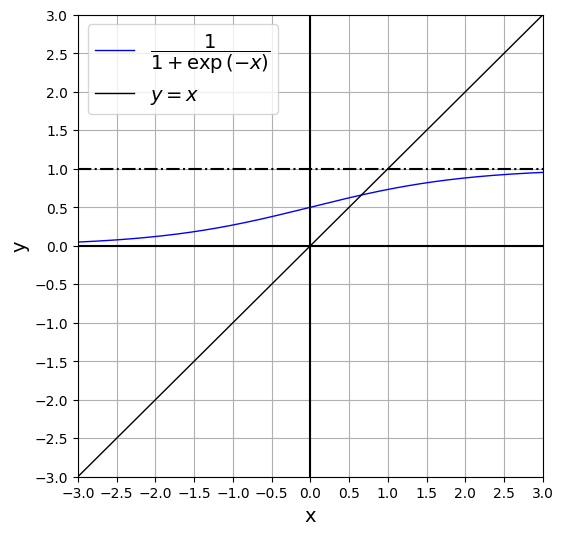

In [2]:
# Define sigmoid function
xx =  np.linspace(-6, 6, 500)
yy = 1 / (np.exp(-xx) + 1)

# Set figure
plt.figure(figsize=(6,6))
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.xticks(np.linspace(-3,3,13))
plt.yticks(np.linspace(-3,3,13))
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()

# Plot functions
plt.plot(xx, yy, c='b', label=r'$\dfrac{1}{1+\exp{(-x)}}$', lw=1)
plt.plot(xx, xx, c='k', label=r'$y = x$', lw=1)

# Plot axis
plt.plot([-3,3], [0,0], c='k')
plt.plot([0,0], [-3,3],c='k')

# Plot y = 1.0
plt.plot([-3,3],[1,1],linestyle='-.',c='k')

plt.legend(fontsize=14)
plt.show()

### データ準備
### Data preparation

In [3]:
# 学習用データ準備
# Preparating data for learning
from sklearn.datasets import load_iris
iris = load_iris()
x_org, y_org = iris.data, iris.target
print('元データ', x_org.shape, y_org.shape)

元データ (150, 4) (150,)


In [4]:
# Verify x data
# Sepal_length, Sepal_width, Petal_length, Petal_width (cm)
x_org

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
# Verify y data
# 0: Setosa, 1:Versicolour, 2:Virginica / 50 each
y_org

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# データ絞り込み
# Data filtering

# Class 0, 1 only
# Sepal_length, sepal_width only
# Limit the number of items to 100
x_data, y_data = iris.data[:100,:2], iris.target[:100]
print('対象データ', x_data.shape, y_data.shape)

対象データ (100, 2) (100,)


In [7]:
# ダミー変数を追加
# Add dummy variable
x_data = np.insert(x_data, 0, 1.0, axis=1)
print('ダミー変数追加後', x_data.shape)
x_data

ダミー変数追加後 (100, 3)


array([[1. , 5.1, 3.5],
       [1. , 4.9, 3. ],
       [1. , 4.7, 3.2],
       [1. , 4.6, 3.1],
       [1. , 5. , 3.6],
       [1. , 5.4, 3.9],
       [1. , 4.6, 3.4],
       [1. , 5. , 3.4],
       [1. , 4.4, 2.9],
       [1. , 4.9, 3.1],
       [1. , 5.4, 3.7],
       [1. , 4.8, 3.4],
       [1. , 4.8, 3. ],
       [1. , 4.3, 3. ],
       [1. , 5.8, 4. ],
       [1. , 5.7, 4.4],
       [1. , 5.4, 3.9],
       [1. , 5.1, 3.5],
       [1. , 5.7, 3.8],
       [1. , 5.1, 3.8],
       [1. , 5.4, 3.4],
       [1. , 5.1, 3.7],
       [1. , 4.6, 3.6],
       [1. , 5.1, 3.3],
       [1. , 4.8, 3.4],
       [1. , 5. , 3. ],
       [1. , 5. , 3.4],
       [1. , 5.2, 3.5],
       [1. , 5.2, 3.4],
       [1. , 4.7, 3.2],
       [1. , 4.8, 3.1],
       [1. , 5.4, 3.4],
       [1. , 5.2, 4.1],
       [1. , 5.5, 4.2],
       [1. , 4.9, 3.1],
       [1. , 5. , 3.2],
       [1. , 5.5, 3.5],
       [1. , 4.9, 3.6],
       [1. , 4.4, 3. ],
       [1. , 5.1, 3.4],
       [1. , 5. , 3.5],
       [1. , 4.5

In [8]:
# 元データのサイズ
# Size of original data
print(x_data.shape, y_data.shape)

# 学習データ、検証データに分割 (シャフルも同時に実施)
# Split into training data and validation data (shuffled at the same time)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, train_size=70, test_size=30, 
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(100, 3) (100,)
(70, 3) (30, 3) (70,) (30,)


### 学習データの散布図表示
### Show a scatter plot of training data

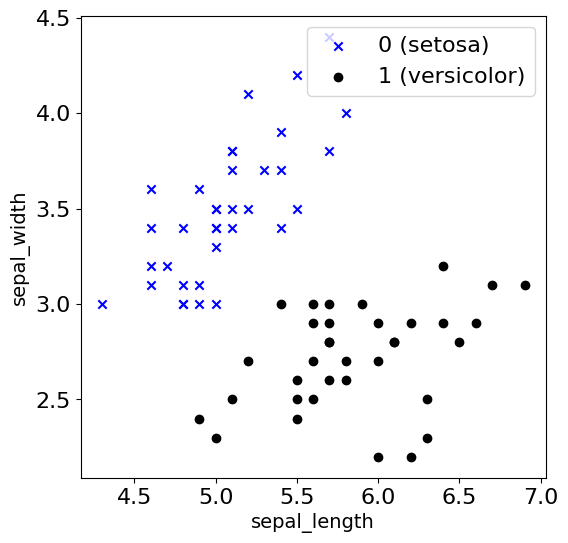

In [9]:
# 散布図の表示
# Show a scatter plot

# Split test data to class = 0 and class = 1
x_t0 = x_train[y_train == 0]    # class = 0
x_t1 = x_train[y_train == 1]    # class = 1

plt.figure(figsize=(6,6))

# plot scatter
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', c='b', label='0 (setosa)')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', c='k', label='1 (versicolor)')

# Set figure
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.show()

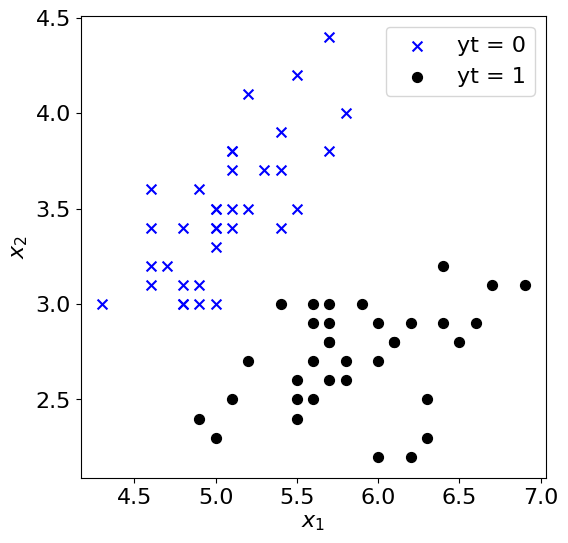

In [10]:
# 散布図の表示
# Show scatter plot
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]

plt.figure(figsize=(6,6))

# Plot scatter
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', s=50, c='b', label='yt = 0')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', s=50, c='k', label='yt = 1')

# Set figure
plt.xlabel(r'$x_1$', fontsize=16)
plt.ylabel(r'$x_2$', fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.show()

### 学習用変数の設定
### Setting variable for learning

In [11]:
# 学習用変数の設定
# Setting variable for learning
x = x_train
yt = y_train

In [12]:
# 入力データ x の表示 (ダミーデータを含む)
# Show input data x including dummy data
print(x[:5])

[[1.  5.1 3.7]
 [1.  5.5 2.6]
 [1.  5.5 4.2]
 [1.  5.6 2.5]
 [1.  5.4 3. ]]


In [13]:
# 正解値 yt の表示
# Show true value yt
print(yt[:5])

[0 1 0 1 1]


### 予測関数

sigmoid function
```math
f(x) = \frac{1}{1 + \exp(-x)}
```

In [14]:
# シグモイド関数
# Sigmoid function
def sigmoid(x):
    return 1/(1+ np.exp(-x)) 

Ref: Prediction value of regression
```math
yp^{(k)(m)} = w^{(k)} * x^{(m)}    \qquad    (7.8.1)
```

In [15]:
# 予測値の計算
# Calculating prediction value
def pred(x, w):
    return sigmoid(x @ w)   # Note that inputting the inner product to the sigmoid function.

### 評価
### Evaluation

Cross entropy function
```math
L(w_0, w_1, w_2) = - \frac{1}{M}\sum_{m=0}^{M-1}(yt^{(m)}*\log(yp^{(m)}) + (1- yt^{(m)})\log(1-yp^{(m)})  \qquad    (8.4.3)
```

In [16]:
# 損失関数(交差エントロピー関数)
# Loss function (cross entropy function)

def cross_entropy(yt, yp):
    # 交差エントロピーの計算(この段階ではベクトル)
    # Calculating cross entropy (vector at this time)
    ce1 = -(yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
    # 交差エントロピーベクトルの平均値を計算
    # Calculating average of cross entropy
    return(np.mean(ce1)) 

In [17]:
# 予測結果の確率値から 0 or 1 を判断する関数
# Define function to judge 0 or 1 from probability value of the rprediction result
def classify(y):
    return np.where(y < 0.5, 0, 1)

In [18]:
# モデルの評価を行う関数
# Define function for evaluating model
from sklearn.metrics import accuracy_score
def evaluate(xt, yt, w):
    
    # 予測値の計算
    # Calculating prediction value
    yp = pred(xt, w)
    
    # 損失関数値の計算
    # Calculating value of loss function
    loss = cross_entropy(yt, yp)
    
    # 予測値(確率値)を0または1に変換
    # converting prediction value (probability value) to 0 or 1
    yp_b = classify(yp)
    
    # 精度の算出
    # Calculating accuracy
    score = accuracy_score(yt, yp_b)
    return loss, score

### 初期化処理
### Initializing process

In [19]:
# 初期化処理
# Initializing process

# 標本数
# Number of sampling
M  = x.shape[0]

# 入力次元数(ダミー変数を含む)
# Number of dimensions of input data including dummy variable
D = x.shape[1]

# 繰り返し回数
# Number of repetitions
iters = 10000

# 学習率
# Learning rate
alpha = 0.01

# 初期値
# Initial value
w = np.ones(D)

# 評価結果記録用 (損失関数と精度)
# For recording evaluation result (loss function and accuracy)
history = np.zeros((0,3))

### メイン処理
### Main process

### Reference

```math
u^{(k)(m)} = w^{(k)} * x^{(m)}    \qquad    (8.6.1)
```

```math
yp^{(k)(m)} = f(u^{(k)(m)})    \qquad    (8.6.2)
```

```math
yd^{(k)(m)} = yp^{(k)(m)} - yt^{(m)}    \qquad    (8.6.4)
```

```math
w^{(k+1)} = w^{(k)} - \frac{\alpha}{M}\sum_{m=0}^{M-1}x^{(m)}*yd^{(k)(m)}   \qquad    (8.6.6)
```


In [20]:
# 繰り返しループ
# Repeat loop
for k in range(iters):
    
    # 予測値の計算 (8.6.1) (8.6.2)
    # calculating prediction value
    yp = pred(x, w)
    
    # 誤差の計算 (8.6.4)
    # Calculating error
    yd = yp - yt
    
    # 勾配降下法の実施 (8.6.6)
    # Implementation of gradient decent
    w = w - alpha * (x.T @ yd) / M
    
    # ログ記録用
    # For recording log
    if ( k % 10 == 0):
        loss, score = evaluate(x_test, y_test, w)
        history = np.vstack((history, 
            np.array([k, loss, score])))
        print( "iter = %d  loss = %f score = %f" 
            % (k, loss, score))

iter = 0  loss = 4.493842 score = 0.500000
iter = 10  loss = 3.565375 score = 0.500000
iter = 20  loss = 2.643280 score = 0.500000
iter = 30  loss = 1.762444 score = 0.500000
iter = 40  loss = 1.085375 score = 0.500000
iter = 50  loss = 0.818721 score = 0.500000
iter = 60  loss = 0.770934 score = 0.500000
iter = 70  loss = 0.761053 score = 0.333333
iter = 80  loss = 0.754468 score = 0.200000
iter = 90  loss = 0.747781 score = 0.166667
iter = 100  loss = 0.740979 score = 0.133333
iter = 110  loss = 0.734193 score = 0.166667
iter = 120  loss = 0.727485 score = 0.200000
iter = 130  loss = 0.720875 score = 0.200000
iter = 140  loss = 0.714368 score = 0.266667
iter = 150  loss = 0.707967 score = 0.300000
iter = 160  loss = 0.701670 score = 0.366667
iter = 170  loss = 0.695476 score = 0.433333
iter = 180  loss = 0.689383 score = 0.500000
iter = 190  loss = 0.683389 score = 0.566667
iter = 200  loss = 0.677493 score = 0.700000
iter = 210  loss = 0.671693 score = 0.700000
iter = 220  loss = 0.

iter = 320  loss = 0.613764 score = 0.933333
iter = 330  loss = 0.608990 score = 0.933333
iter = 340  loss = 0.604292 score = 0.933333
iter = 350  loss = 0.599669 score = 0.933333
iter = 360  loss = 0.595118 score = 0.933333
iter = 370  loss = 0.590638 score = 0.933333
iter = 380  loss = 0.586229 score = 0.933333
iter = 390  loss = 0.581889 score = 0.933333
iter = 400  loss = 0.577616 score = 0.933333
iter = 410  loss = 0.573409 score = 0.933333
iter = 420  loss = 0.569267 score = 0.933333
iter = 430  loss = 0.565189 score = 0.933333
iter = 440  loss = 0.561174 score = 0.933333
iter = 450  loss = 0.557219 score = 0.933333
iter = 460  loss = 0.553325 score = 0.933333
iter = 470  loss = 0.549490 score = 0.933333
iter = 480  loss = 0.545713 score = 0.933333
iter = 490  loss = 0.541993 score = 0.933333
iter = 500  loss = 0.538328 score = 0.933333
iter = 510  loss = 0.534718 score = 0.933333
iter = 520  loss = 0.531162 score = 0.933333
iter = 530  loss = 0.527658 score = 0.933333
iter = 540

### 結果確認
### Check results

In [21]:
# 損失関数値と精度の確認
# Check value of loss function and accrcy
print('初期状態: 損失関数:%f 精度:%f' 
      % (history[0,1], history[0,2]))
print('最終状態: 損失関数:%f 精度:%f' 
      % (history[-1,1], history[-1,2]))

初期状態: 損失関数:4.493842 精度:0.500000
最終状態: 損失関数:0.153947 精度:0.966667


```math
u = w_0 + w_1*x_1 + w_2*x_2    \qquad 
```
Decision boundary: u = 0

```math
0 = w_0 + w_1*x_1 + w_2*x_2    \qquad 
```

```math
x_2 = - \frac{w_0 + w_1 * x_1}{w_2}    \qquad 
```

In [22]:
# 検証データを散布図用に準備
# Preparing test data for scatter plot
x_t0 = x_test[y_test==0]
x_t1 = x_test[y_test==1]

# 決定境界描画用 x1の値から x2の値を計算する
# For decision boundary / Calculating from value of x1 to x2
def b(x, w):
    return(-(w[0] + w[1] * x)/ w[2])

# 散布図のx1の最小値と最大値
# Minimum and max value of x1 in scatter plot
xl = np.asarray([x[:,1].min(), x[:,1].max()])
yl = b(xl, w)   # yl is x2

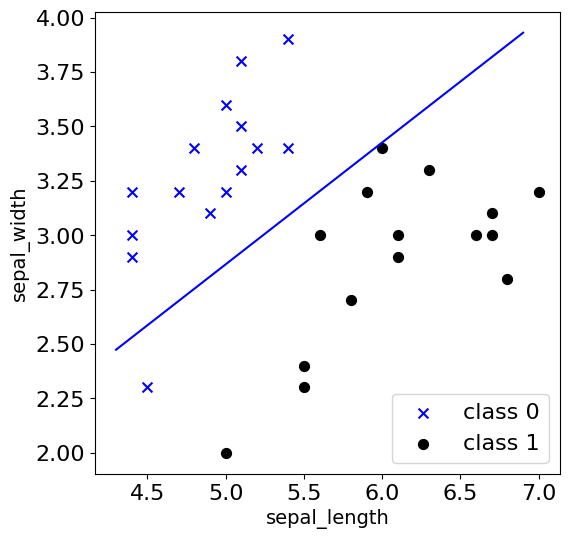

In [23]:
# 散布図の表示
# Show scatter plot
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', 
        c='b', s=50, label='class 0')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', 
        c='k', s=50, label='class 1')

# 散布図に決定境界の直線も追記
# Add decision boundary line on scatter plot
plt.plot(xl, yl, c='b')

# Set figure
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.show()

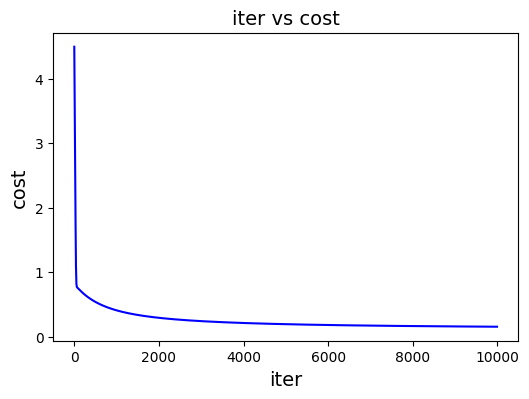

In [24]:
# 学習曲線の表示をします (損失関数)
# Show learning curve (loss function)
plt.figure(figsize=(6,4))
plt.plot(history[:,0], history[:,1], 'b')

# Set figure
plt.xlabel('iter', fontsize=14)
plt.ylabel('cost', fontsize=14)
plt.title('iter vs cost', fontsize=14)
plt.show()

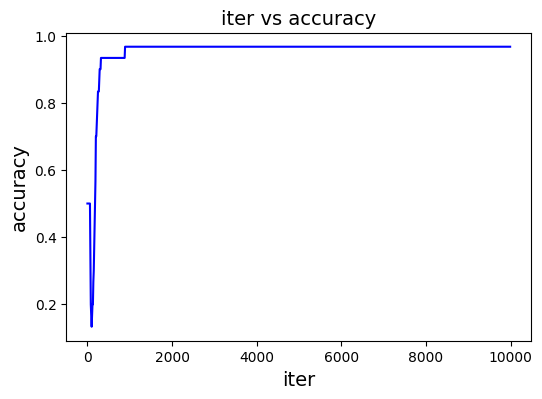

In [25]:
# 学習曲線の表示をします (精度)
# Show learning curve (accracy)
plt.figure(figsize=(6,4))
plt.plot(history[:,0], history[:,2], 'b')

# Set function
plt.xlabel('iter', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.title('iter vs accuracy', fontsize=14)
plt.show()

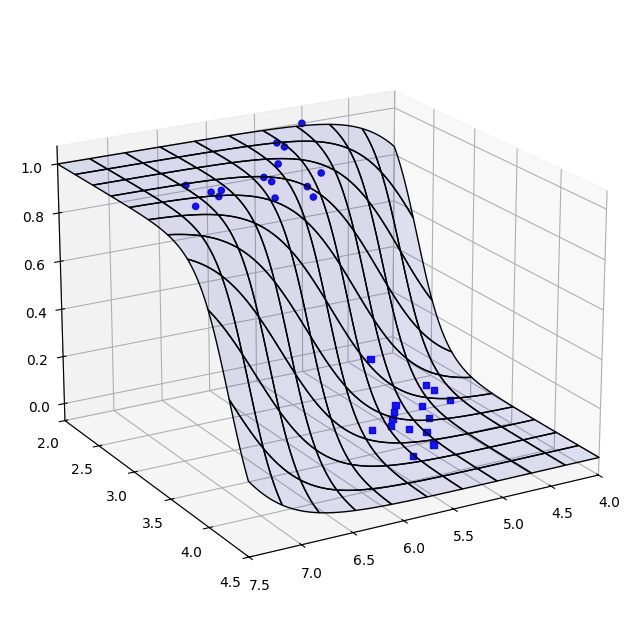

In [26]:
from mpl_toolkits.mplot3d import Axes3D
x1 = np.linspace(4, 7.5, 100)
x2 = np.linspace(2, 4.5, 100)
xx1, xx2 = np.meshgrid(x1, x2)
xxx = np.asarray([np.ones(xx1.ravel().shape), 
    xx1.ravel(), xx2.ravel()]).T
c = pred(xxx, w).reshape(xx1.shape)
plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx1, xx2, c, color='blue', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.1)
ax.scatter(x_t1[:,1], x_t1[:,2], 1, s=20, alpha=0.9, marker='o', c='b')
ax.scatter(x_t0[:,1], x_t0[:,2], 0, s=20, alpha=0.9, marker='s', c='b')
ax.set_xlim(4,7.5)
ax.set_ylim(2,4.5)
ax.view_init(elev=20, azim=60)

## scikit-learnライブラリの利用
## Using scikit-learn library

In [27]:
# 必要ライブラリのロード
# import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# モデル生成
# model generation
model_lr = LogisticRegression(solver='liblinear')
model_svm = svm.SVC(kernel='linear')

# 機械学習実施
# Do machine learning
model_lr.fit(x, yt)
model_svm.fit(x, yt)

SVC(kernel='linear')

In [28]:
# Linear regression

# 切片
# Intercept value
lr_w0 = model_lr.intercept_[0]

# x1の係数
# Coefficient of x1(sepal_length)
lr_w1 = model_lr.coef_[0,1]

# x2の係数
# Coefficient of x2(sepal_width)
lr_w2 = model_lr.coef_[0,2]

# SVM

# 切片
# Intercept value
svm_w0 = model_svm.intercept_[0]

# x1の係数
# Coefficient of x1(sepal_width)
svm_w1 = model_svm.coef_[0,1]

# x2の係数
# Coefficient of x2(sepal_width)
svm_w2 = model_svm.coef_[0,2]

In [29]:
# 限界直線描画用 x1の値から x2の値を計算する
# For drawing limit line from value of x1 to x2
def rl(x):
    wk = lr_w0 + lr_w1 * x
    wk2 = -wk / lr_w2
    return(wk2)

In [30]:
# 限界直線描画用 x1の値から x2の値を計算する
# For drawing limit line from value of x1 to x2
def svm(x):
    wk = svm_w0 + svm_w1 * x
    wk2 = -wk / svm_w2
    return(wk2)

In [31]:
y_rl = rl(xl)
y_svm = svm(xl)
# Check result
print(xl, yl, y_rl, y_svm)

[4.3 6.9] [2.47353128 3.93052473] [2.50344682 4.05984593] [2.17911792 4.42574136]


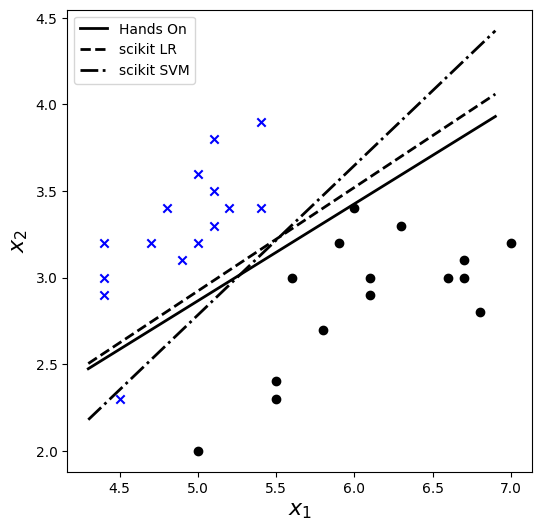

In [32]:
# 散布図に限界直線も追記する
# Add limit line to scatter plot

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

# 散布図の表示
# Show scatter plot
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', c='b')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', c='k')

# 限界直線の表示
# Show limit line

# Hands on
ax.plot(xl, yl, linewidth=2, c='k', label='Hands On')

# lr model
ax.plot(xl, y_rl, linewidth=2, c='k', linestyle="--", label='scikit LR')

# svm
ax.plot(xl, y_svm, linewidth=2, c='k', linestyle="-.", label='scikit SVM')

# Set figure
ax.legend()
ax.set_xlabel('$x_1$', fontsize=16)
ax.set_ylabel('$x_2$', fontsize=16)
plt.show()